In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_18572/2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
nan_merge = pd.read_csv('../docs/master_merge.csv', index_col=0)

In [6]:
nan_merge.columns

Index(['name', 'iso6393', 'glottocode', 'Degree of endangerment', 'aes_status',
       'level', 'macroarea', 'type', 'scope', 'speakers', 'family', 'dialects',
       'regions', 'off_lang', 'rec_min_lang', 'latitude', 'longitude', 'url'],
      dtype='object')

In [28]:
nan_merge['url'].value_counts()

url
Data unavailable                                        6613
https://en.wikipedia.org/wiki/Piu_language                 1
https://en.wikipedia.org/wiki/Pitjantjatjara               1
https://en.wikipedia.org/wiki/Maleng_language              1
https://en.wikipedia.org/wiki/Polonomombauk_language       1
                                                        ... 
https://en.wikipedia.org/wiki/Ingush_language              1
https://en.wikipedia.org/wiki/I%C3%B1apari_language        1
https://en.wikipedia.org/wiki/Iquito_language              1
https://en.wikipedia.org/wiki/Myky_language                1
https://en.wikipedia.org/wiki/Zay_language                 1
Name: count, Length: 978, dtype: int64

In [29]:
nan_merge['Degree of endangerment'] = nan_merge['Degree of endangerment'].replace('Data unavailable', np.nan)
nan_merge['speakers'] = nan_merge['speakers'].replace('Unknown', np.nan)
nan_merge['family'] = nan_merge['family'].replace('<ul><li>Uknown</li></ul>', np.nan)
nan_merge['dialects'] = nan_merge['dialects'].replace('Unknown', np.nan)
nan_merge['regions'] = nan_merge['regions'].replace('Data unavailable', np.nan)
nan_merge['off_lang'] = nan_merge['off_lang'].replace('Unknown', np.nan)
nan_merge['rec_min_lang'] = nan_merge['rec_min_lang'].replace('Unknown', np.nan)
nan_merge['url'] = nan_merge['url'].replace('Data unavailable', np.nan)

/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_18572/1919943305.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nan_merge.isnull().mean().sort_values(ascending=False).index, y=nan_merge.isnull().mean().sort_values(ascending=False), palette='magma')


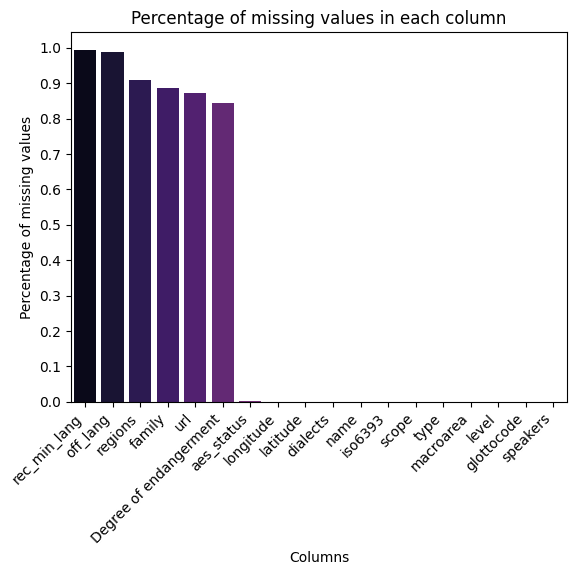

In [56]:
# visualize the nan values as a percentage for each column  

sns.barplot(x=nan_merge.isnull().mean().sort_values(ascending=False).index, y=nan_merge.isnull().mean().sort_values(ascending=False), palette='magma')
# nan_merge.isnull().mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), cmap='magma')
plt.ylabel('Percentage of missing values')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of missing values in each column')
# plt.set_cmap("magma")
plt.show()
